In [98]:
# Mohammad Ali Zahir
# Student ID: 40077619
# COMP 333 - Data Analytics
# Objective: Create a Jupyter notebook using Python and its libraries, to analyse the Titanic dataset 
# using EDA to develop a story about the survival of children aboard the Titanic. Markup
# the notebook so it contains the content of your four-slide story embedded in the notebook.
# Output: Visualization and the story telling of the story-telling PDF 

# Librairies

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


# Situation

Many lives were lost in the crash of the large ship called the Titanic in 1912. Our goal for analyzing the data would be to find any patterns which caused the crash and then we may be able to determine some new safety measures to prevent the repeat of a crash of this magnitude.

In [100]:
# Loading the dataset 

df = pd.read_csv('./data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
# Seperate the dead passengers vs the passengers who survived
survived_passengers = len(df[df['Survived'] ==1])
dead_passengers = len(df["Survived"]) - survived_passengers

table_data = [
    ["Data", "Value"],
    ["Survived Passengers", survived_passengers],
    ["Dead Passengers", dead_passengers]
]

# Use tabulate to format the table as a string
table_str = tabulate(table_data, headers="firstrow", tablefmt="grid")

# Print the formatted table string
print(table_str)


+---------------------+---------+
| Data                |   Value |
+=====================+=========+
| Survived Passengers |     342 |
+---------------------+---------+
| Dead Passengers     |     549 |
+---------------------+---------+


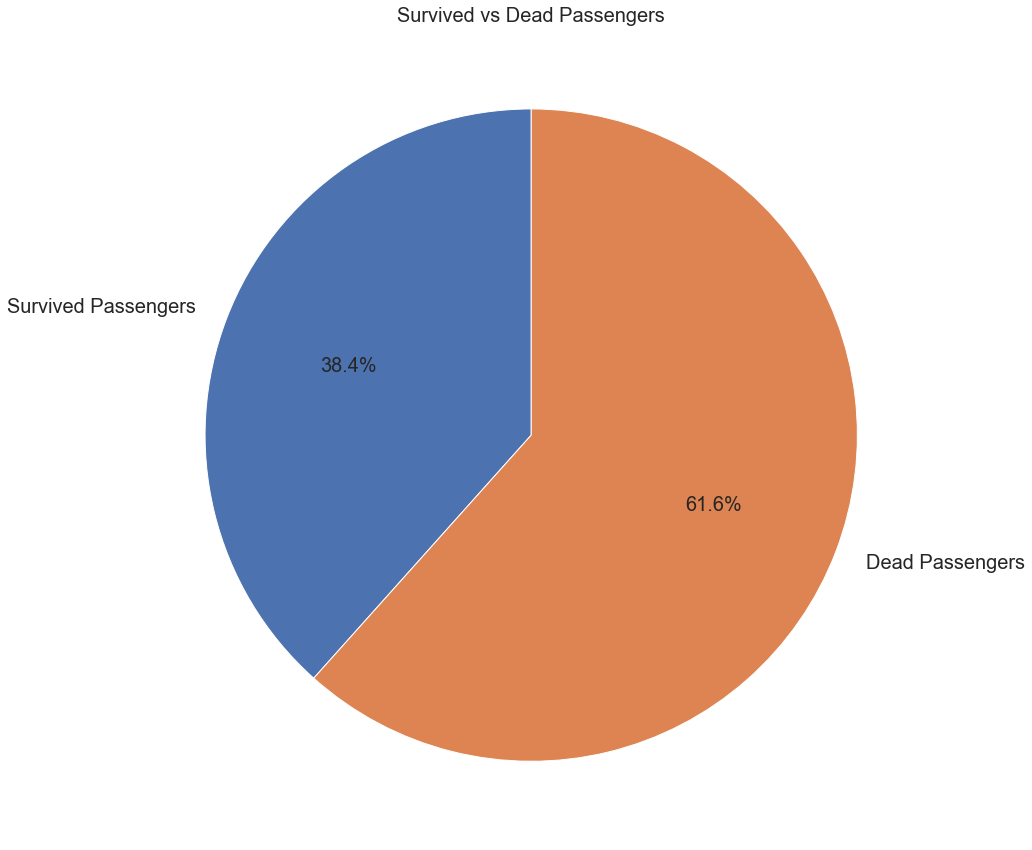

In [102]:
# Calculate the percentage of survived and dead passengers
survived_percentage = round(survived_passengers / len(df) * 100, 2)
dead_percentage = round(dead_passengers / len(df) * 100, 2)

# Create a list of the values for the pie chart
pie_values = [survived_passengers, dead_passengers]

# Create a list of the labels for the pie chart with percentage
pie_labels = [
    f"Survived Passengers",
    f"Dead Passengers"
]

# Create the pie chart
fig, ax = plt.subplots(figsize=(15,15))
ax.pie(pie_values, labels=pie_labels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 20})

# Set the background color of the figure to white
fig.patch.set_facecolor('white')

# Add a title to the pie chart
ax.set_title("Survived vs Dead Passengers", fontdict={'size': 20})

# Display the pie chart
plt.show()

# Problem

We want to find the variables which may or may not have contributed to the survival of children in the crash. Here we will decide that anyone aged 13 or below is considered to be a child.

# Solution

We will determine which features create a proper correlation with the survival rate of children during the crash.

In [103]:
# Seperate the child from the adults
child_passengers = df[df['Age'] <=13]
adult_passengers = df[df['Age'] >13]

table_data = [
    ["Data", "Value"],
    ["Child Passengers", len(child_passengers)],
    ["Adult Passengers", len(adult_passengers)]
]

# Use tabulate to format the table as a string
table_str = tabulate(table_data, headers="firstrow", tablefmt="grid")

# Print the formatted table string
print(table_str)

+------------------+---------+
| Data             |   Value |
+==================+=========+
| Child Passengers |      71 |
+------------------+---------+
| Adult Passengers |     643 |
+------------------+---------+


In [104]:
# Seperate the dead children vs the alive children
alive_children = len(child_passengers[child_passengers["Survived"] ==1])
dead_children = len(child_passengers) - alive_children

table_data = [
    ["Data", "Value"],
    ["Children Alive", alive_children],
    ["Children Dead", dead_children]
]

# Use tabulate to format the table as a string
table_str = tabulate(table_data, headers="firstrow", tablefmt="grid")

# Print the formatted table string
print(table_str)

+----------------+---------+
| Data           |   Value |
+================+=========+
| Children Alive |      42 |
+----------------+---------+
| Children Dead  |      29 |
+----------------+---------+


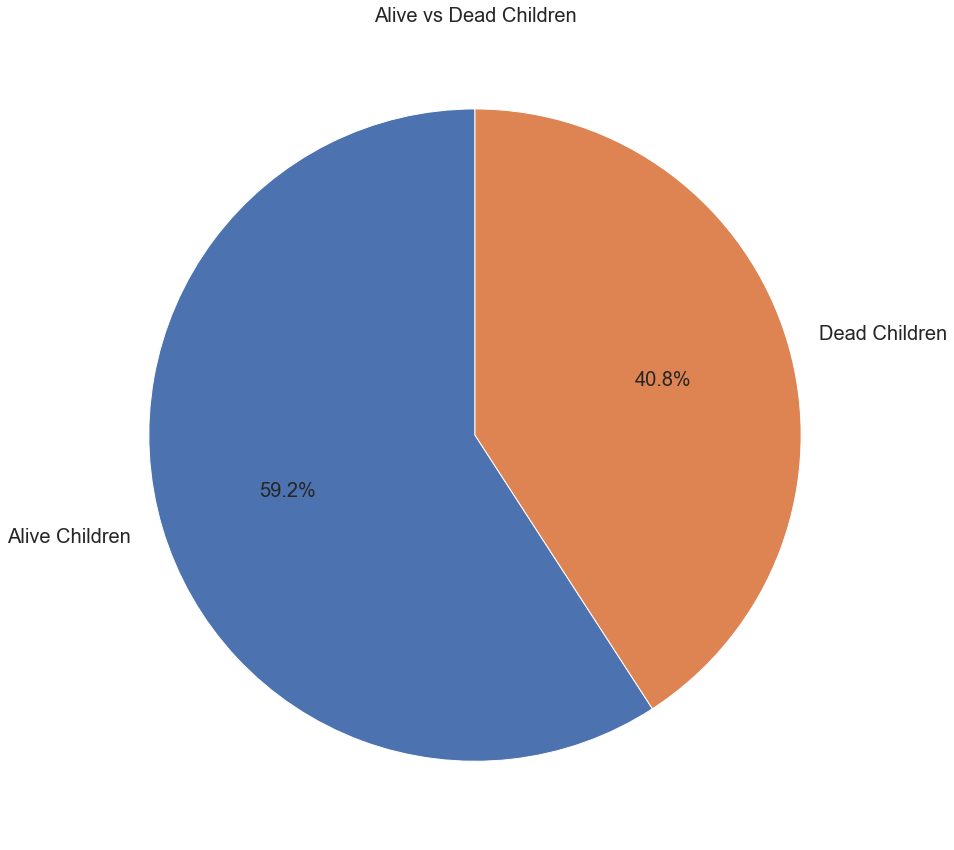

In [105]:
# Calculate the percentage of survived and dead passengers
survived_percentage = round(alive_children / len(df) * 100, 2)
dead_percentage = round(dead_children / len(df) * 100, 2)

# Create a list of the values for the pie chart
pie_values = [alive_children, dead_children]

# Create a list of the labels for the pie chart with percentage
pie_labels = [
    f"Alive Children",
    f"Dead Children"
]

# Create the pie chart
fig, ax = plt.subplots(figsize=(15,15))
ax.pie(pie_values, labels=pie_labels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 20})

# Set the background color of the figure to white
fig.patch.set_facecolor('white')

# Add a title to the pie chart
ax.set_title("Alive vs Dead Children", fontdict={'size': 20})

# Display the pie chart
plt.show()

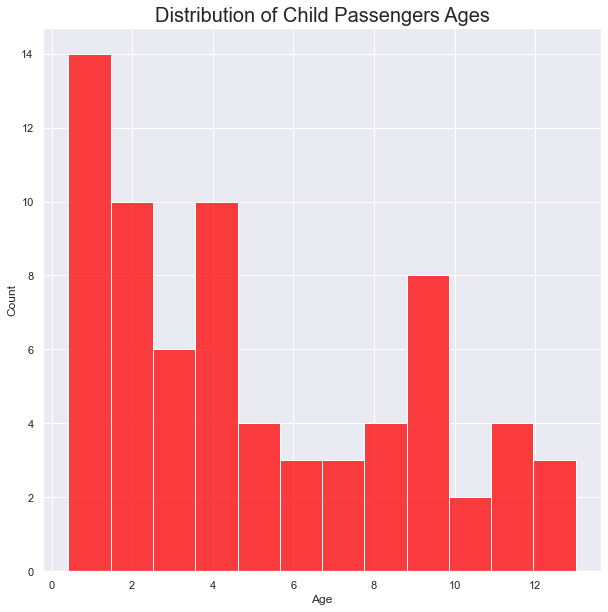

In [106]:
# We would create a histogram of the distribution of children
plt.figure(figsize=(10,10))
sns.histplot(data=child_passengers, x='Age', bins=12, color='red')
plt.title('Distribution of Child Passengers Ages', fontdict={'size':20})
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

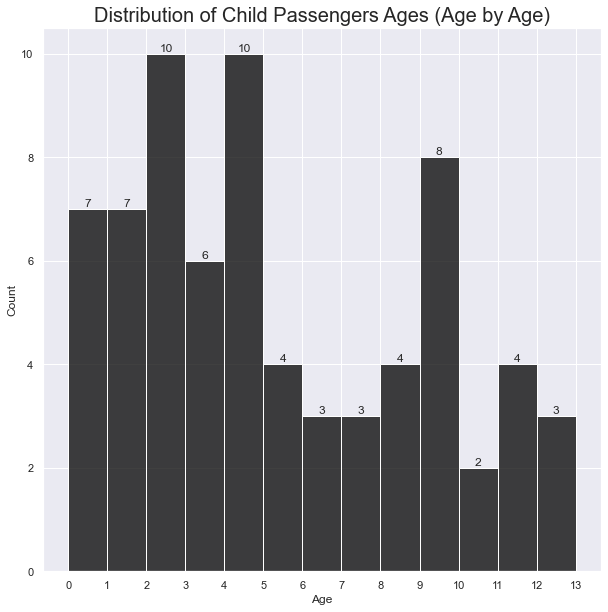

In [123]:
# We would create a histogram of the distribution of children

ages = list(range(0,14))

plt.figure(figsize=(10,10))
ax = sns.histplot(data=child_passengers, x='Age', bins=ages, color='black')
plt.title('Distribution of Child Passengers Ages (Age by Age)', fontdict={'size':20})

# Display count values inside the bars
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height +0.2, int(height), ha='center', va='top')
plt.xlabel('Age')
plt.xticks(ages)
plt.ylabel('Count')
plt.show()

Based on these observations, we can see that this is a normal distribution where we see that children aged between 5 and 6 are the ones that died the most. In addition to that, we also see that young babies (aged 0-1), and early teenagers (aged 12-13) have a 100% survival rate. 

This could be due to many factors such as parents not leaving young babies alone ever, and the young teenagers being aware how to swim and climb areas unreachable by water. However, this is all inconclusive. 

To further continue the analysis, we could check which other factors can be leaded to this. Initially we can check for the passenger class, as there is some differences with the children there. 

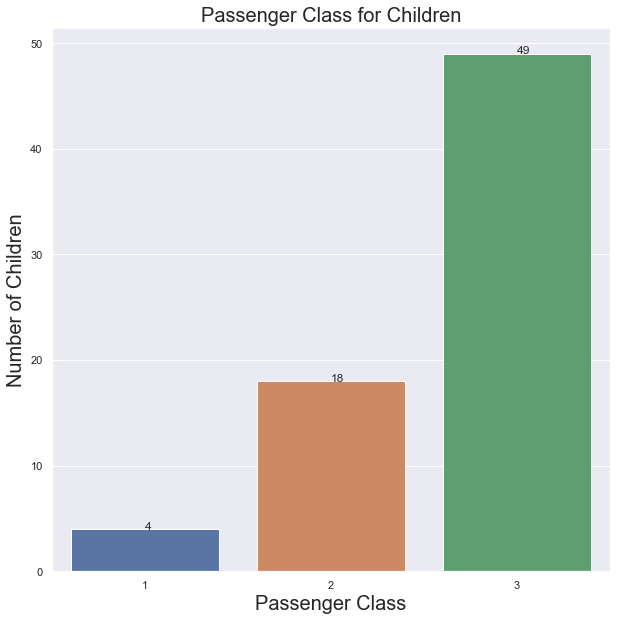

In [108]:
# Checking the passenger class for the children
children_passengers = child_passengers["Pclass"].value_counts()

# Set the figure size
plt.figure(figsize=(10, 10))

# Create barplot using seaborn
sns.set(style="darkgrid")
ax = sns.barplot(x=children_passengers.index, y=children_passengers.values)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()))

# Add title and axis labels
plt.title("Passenger Class for Children", fontdict={'size':20})
plt.xlabel("Passenger Class",fontdict={'size':20})
plt.ylabel("Number of Children", fontdict={'size':20})

# Show the plot
plt.show()

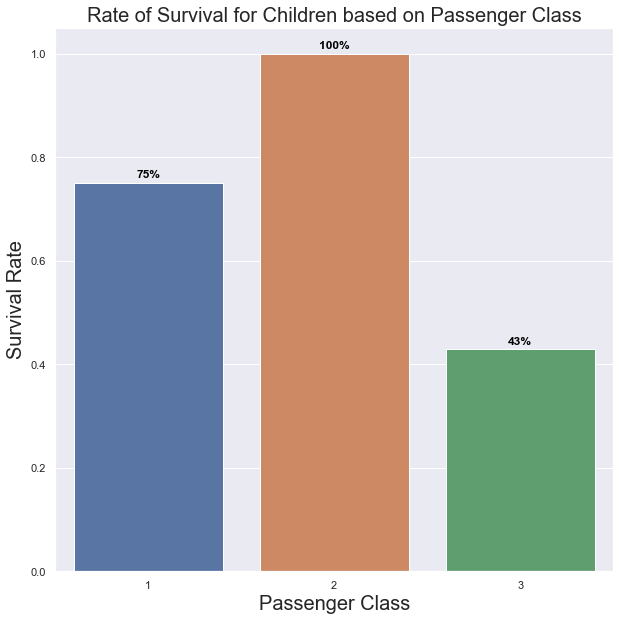

In [109]:
# Calculate survival rate of children based on passenger class
children_survival = child_passengers.groupby("Pclass")["Survived"].mean()

# Set the figure size
plt.figure(figsize=(10, 10))

# Create barplot using seaborn
sns.set(style="darkgrid")
ax = sns.barplot(x=children_survival.index, y=children_survival.values)

# Display percentage values inside the bars
for i, v in enumerate(children_survival.values):
    ax.text(i, v+0.01, '{:.0%}'.format(v), color='black', fontweight='bold', ha='center')

# Add title and axis labels
plt.title("Rate of Survival for Children based on Passenger Class",fontdict={'size':20})
plt.xlabel("Passenger Class", fontdict={'size':20})
plt.ylabel("Survival Rate", fontdict={'size':20})

# Show the plot
plt.show()

Based on this, we have some unexpected results. We initially see that the most amount of children are in the 3rd passenger class, however we are getting the lowest amoung of survival percentage for that class. It is the same for passenger class 1, where we see 3 out of the 4 children survive. Hence we can not draw any correlation from this, and would need to continue with another variable of the analysis. Let's try to see if there is any correlation between the port embarked and the survival rate of the children.

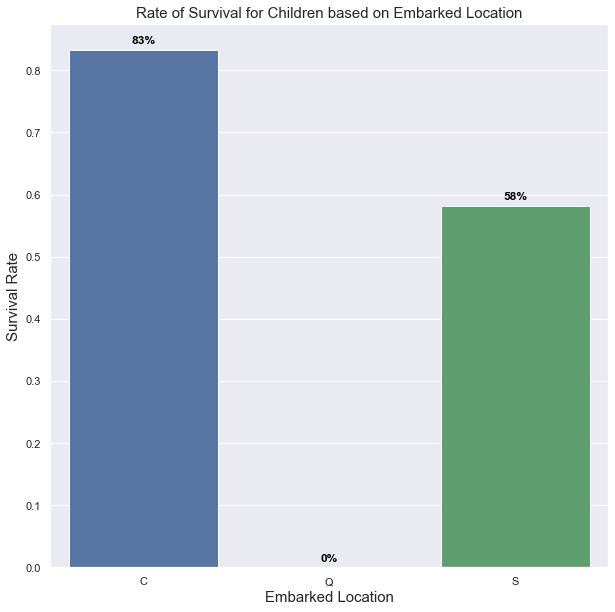

In [110]:
# Calculate survival rate of children based on their embarked location
children_survival = child_passengers.groupby("Embarked")["Survived"].mean()

# Set the figure size
plt.figure(figsize=(10, 10))

# Create barplot using seaborn
sns.set(style="darkgrid")
ax = sns.barplot(x=children_survival.index, y=children_survival.values)

# Display percentage values inside the bars
for i, v in enumerate(children_survival.values):
    ax.text(i, v+0.01, '{:.0%}'.format(v), color='black', fontweight='bold', ha='center')

# Add title and axis labels
plt.title("Rate of Survival for Children based on Embarked Location", fontdict={'size': 15})
plt.xlabel("Embarked Location", fontdict={'size': 15})
plt.ylabel("Survival Rate", fontdict={'size': 15})

# Show the plot
plt.show()


Here we can see that 0% of the people who embarked at Port Q survived, hence let's further analyze this

In [111]:
# Print the families who boarded in port Q
embarked_q = child_passengers[child_passengers["Embarked"] == "Q"]
print(embarked_q.to_markdown())

|     |   PassengerId |   Survived |   Pclass | Name                      | Sex   |   Age |   SibSp |   Parch |   Ticket |   Fare |   Cabin | Embarked   |
|----:|--------------:|-----------:|---------:|:--------------------------|:------|------:|--------:|--------:|---------:|-------:|--------:|:-----------|
|  16 |            17 |          0 |        3 | Rice, Master. Eugene      | male  |     2 |       4 |       1 |   382652 | 29.125 |     nan | Q          |
| 171 |           172 |          0 |        3 | Rice, Master. Arthur      | male  |     4 |       4 |       1 |   382652 | 29.125 |     nan | Q          |
| 278 |           279 |          0 |        3 | Rice, Master. Eric        | male  |     7 |       4 |       1 |   382652 | 29.125 |     nan | Q          |
| 787 |           788 |          0 |        3 | Rice, Master. George Hugh | male  |     8 |       4 |       1 |   382652 | 29.125 |     nan | Q          |


Here we can see that all 4 are from the same family, hence it is very likely they all perished together when the crash happened. However, we can also check some others factors to make sure. However, based on this now we can check of what happens when children have multiple siblings.

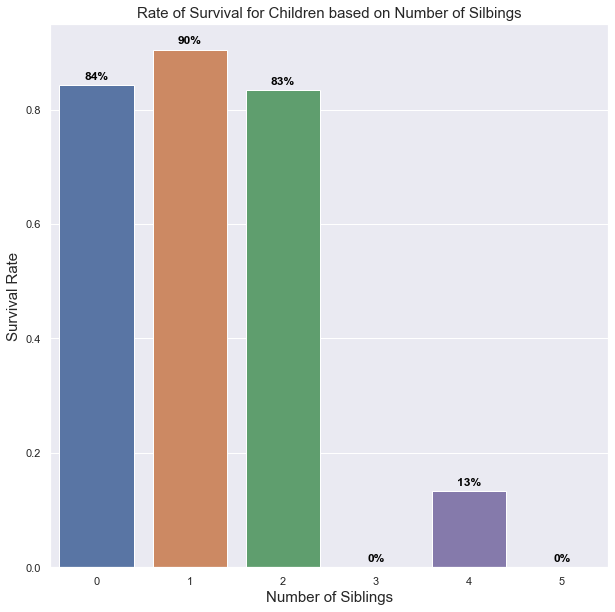

In [112]:
# Calculate survival rate of children based on the number of siblings they have
children_survival = child_passengers.groupby("SibSp")["Survived"].mean()

# Set the figure size
plt.figure(figsize=(10, 10))

# Create barplot using seaborn
sns.set(style="darkgrid")
ax = sns.barplot(x=children_survival.index, y=children_survival.values)

# Display percentage values inside the bars
for i, v in enumerate(children_survival.values):
    ax.text(i, v+0.01, '{:.0%}'.format(v), color='black', fontweight='bold', ha='center')

# Add title and axis labels
plt.title("Rate of Survival for Children based on Number of Silbings", fontdict={'size': 15})
plt.xlabel("Number of Siblings", fontdict={'size': 15})
plt.ylabel("Survival Rate", fontdict={'size': 15})

# Show the plot
plt.show()

Here we can make a clear correlation with the higher the number of siblings a child has, the lower their chance of survival is. We can also simplify this further by saying that if you have 3 or more siblings, your the max chance of survival you have is 13% which is abysmaly low. 

This leads to two correlations who are intertwined:

- The more siblings you have, the lower your chance of survival will be.
- If all the siblings are from the same family, the lower the chance of survival will be since families will tend to stick together.

# Next Step

Based on our analysis, we can draw 3 different conclusions:

1. Children who are at the extremes spectrum (0-1 and 12-13) have a higher chance of survival, and children in the middle of the spectrum have a lower chance of survival.
2. Children who embark the same port as a family will more than likely perish together.
3. The higher amount of siblings you have, the lower your chance of survival get.


While we would need further testing and analysis to fully prove these three observations, we can still apply some steps as to reduce their effects in case another Titanic sails the high seas.

For example, in the future, we can limit the number of siblings a children can have to 2, so that we can prevent such tragedies. We can also apply the same safety and security procedures applied to the children of class 2 to the other class so that this does not happen again.